In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertisingcsv/Advertising.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 5)

In [8]:

df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000



Basic Observation

Avg expense spend is highest on TV

Avg expense spend is lowest on Radio

Max sale is 27 and min is 1.6

In [40]:
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

In [43]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000



Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


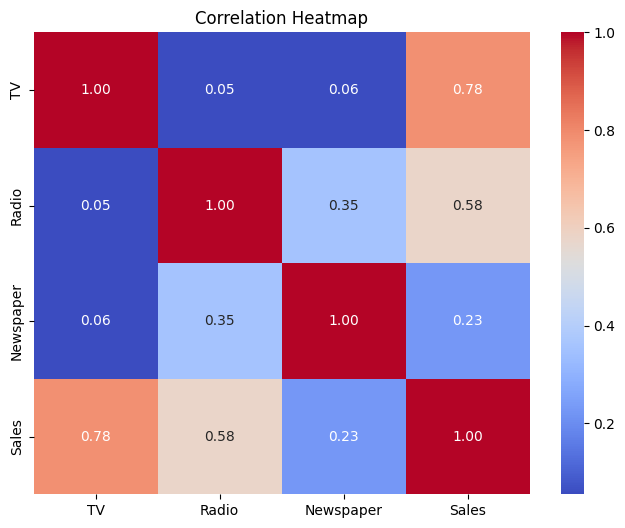

In [55]:
correlation = df.corr()
print("\nCorrelation Matrix:")
print(correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

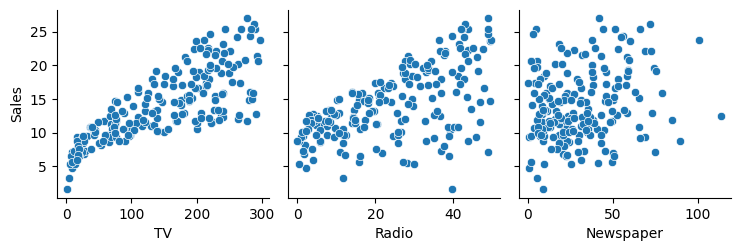

In [10]:
sns.pairplot(df, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

Pair Plot Observation

When advertising cost increases in TV Ads the sales will increase as well. While the for newspaper and radio it is bit unpredictable

<Axes: ylabel='Frequency'>

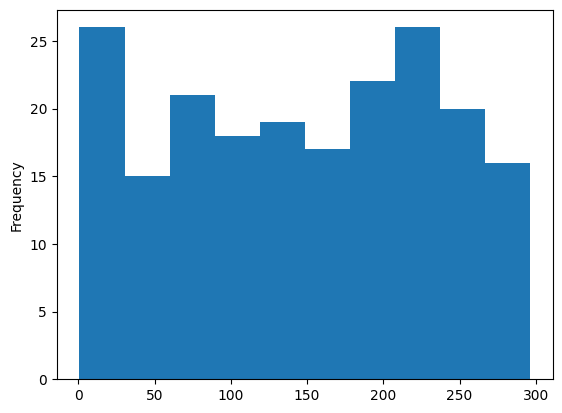

In [11]:

df['TV'].plot.hist(bins=10)

<Axes: xlabel='Radio', ylabel='Frequency'>

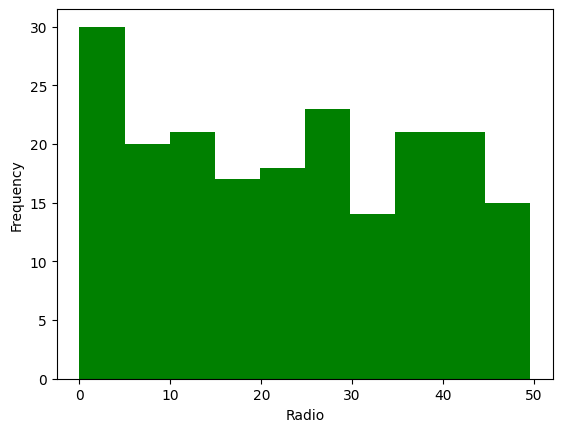

In [12]:
df['Radio'].plot.hist(bins=10, color="green", xlabel="Radio")

<Axes: xlabel='newspaper', ylabel='Frequency'>

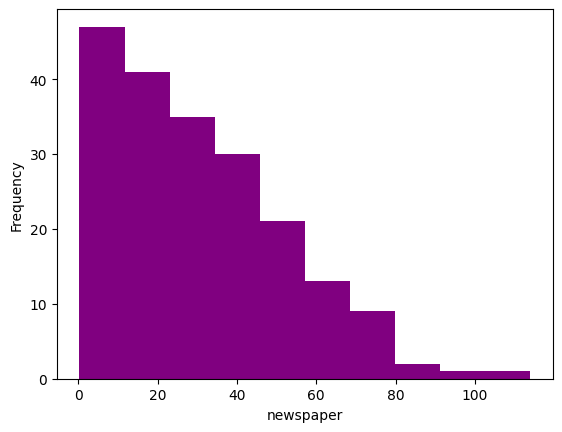

In [13]:

df['Newspaper'].plot.hist(bins=10,color="purple", xlabel="newspaper")

# 1. TV vs Sales with trendline

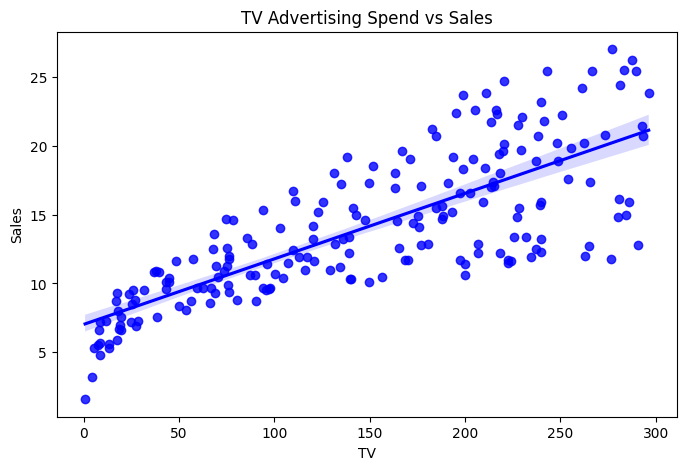

In [58]:
plt.figure(figsize=(8, 5))
sns.regplot(x='TV', y='Sales', data=df, color='blue')
plt.title("TV Advertising Spend vs Sales")
plt.show()


# 2. Radio vs Sales with trendline

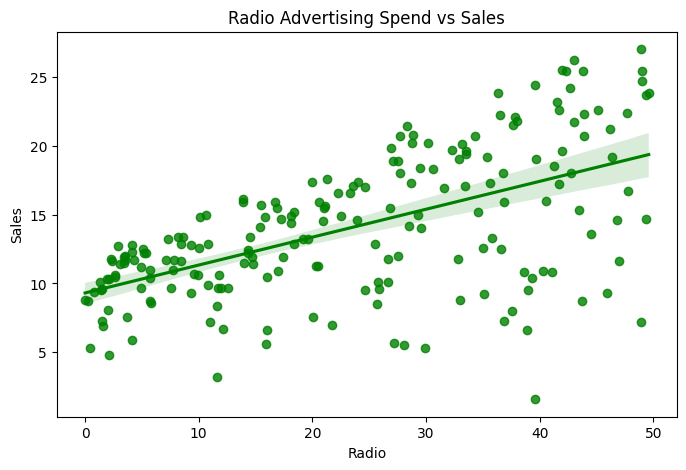

In [59]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Radio', y='Sales', data=df, color='green')
plt.title("Radio Advertising Spend vs Sales")
plt.show()

# 3. Newspaper vs Sales with trendline

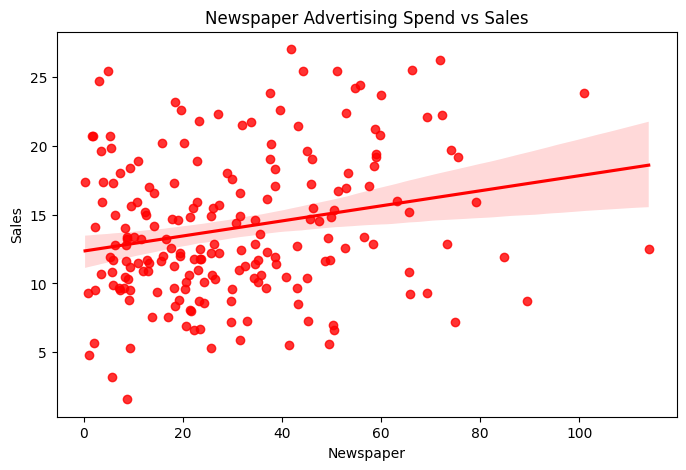

In [61]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Newspaper', y='Sales', data=df, color='red')
plt.title("Newspaper Advertising Spend vs Sales")
plt.show()

# 4. Jointplot of TV and Sales

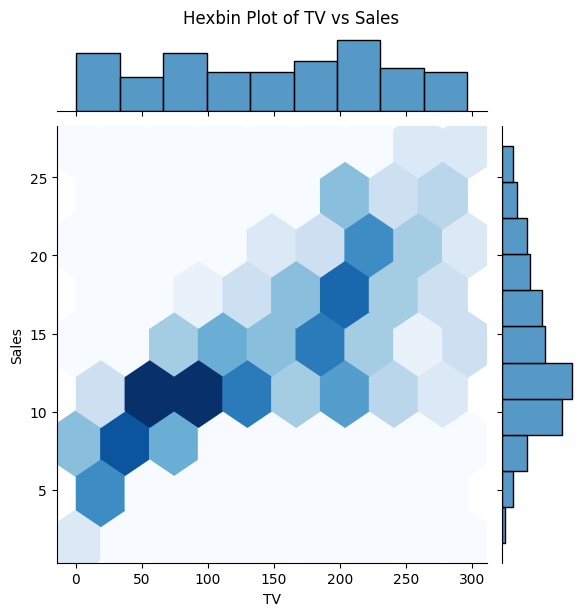

In [108]:
sns.jointplot(x='TV', y='Sales', data=df, kind="hex", cmap="Blues", height=6)
plt.suptitle("Hexbin Plot of TV vs Sales", y=1.02)
plt.show()


# 5. Distribution of Sales

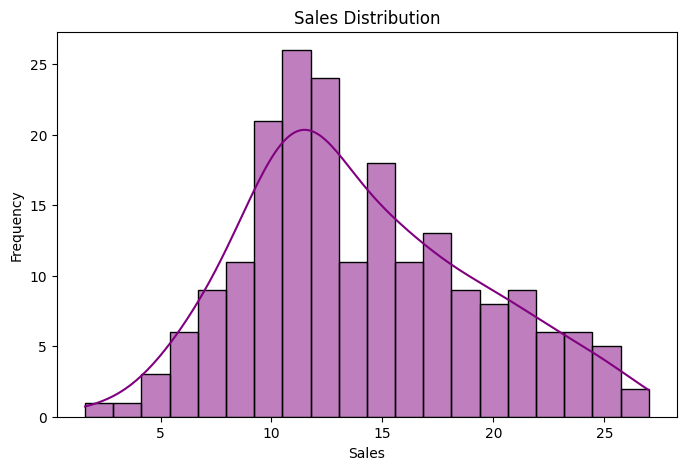

In [68]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Distribution of Sales
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], kde=True, bins=20, color='purple')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


# 6. Pairwise comparison with hue (optional segmentation)


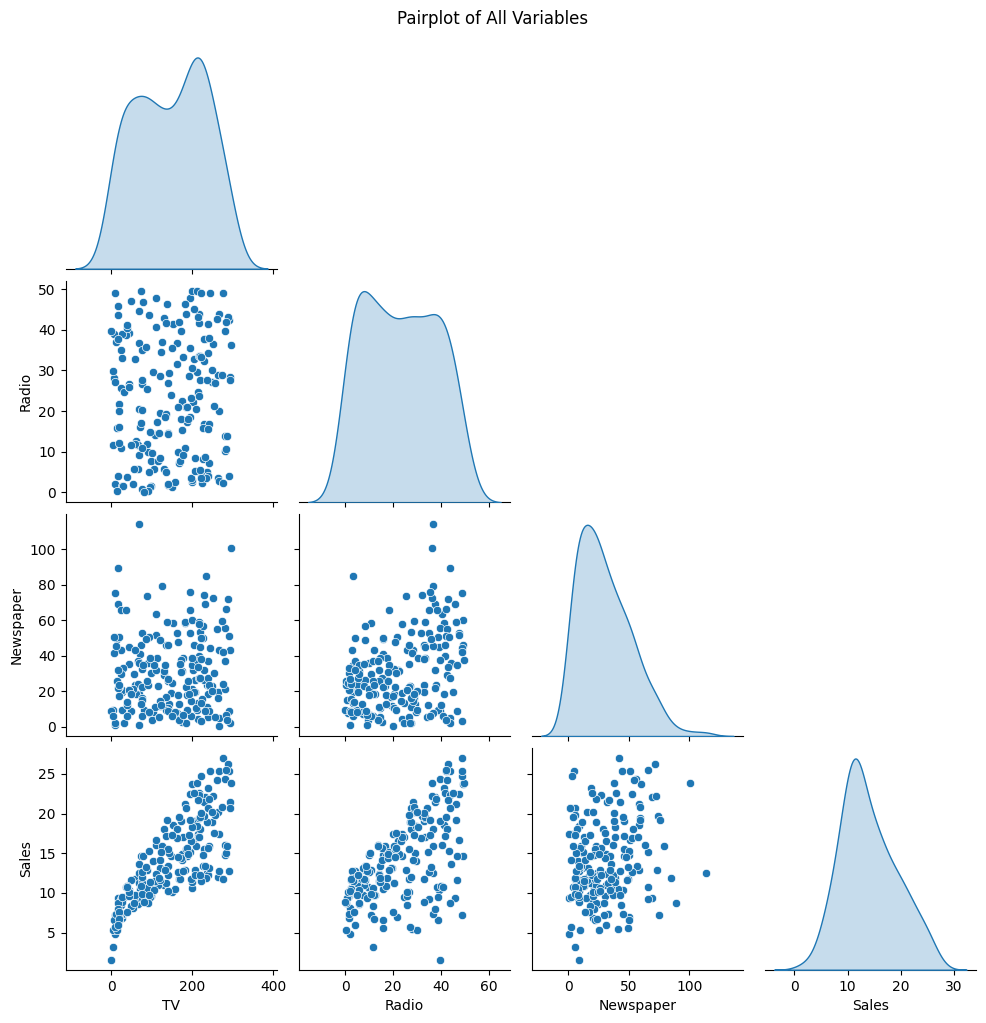

In [69]:
sns.pairplot(df, diag_kind="kde", kind="scatter", corner=True)
plt.suptitle("Pairplot of All Variables", y=1.02)
plt.show()

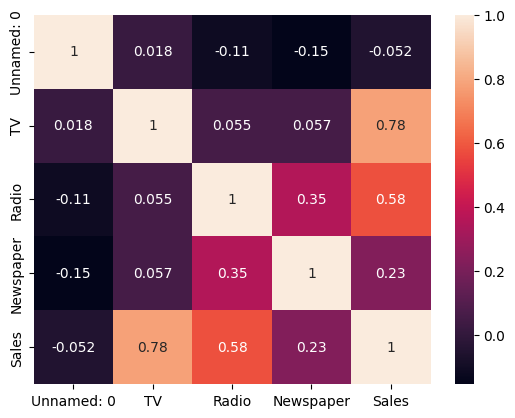

In [14]:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# Assuming df is a pandas DataFrame with 'TV' and 'Sales' columns
X_train, X_test, y_train, y_test = train_test_split(
    df[['TV']], df[['Sales']], test_size=0.2, random_state=42
)


In [19]:

print(X_train)


        TV
79   116.0
197  177.0
38    43.1
24    62.3
122  224.0
..     ...
106   25.0
14   204.1
92   217.7
179  165.6
102  280.2

[160 rows x 1 columns]


In [20]:

print(y_train)

     Sales
79    11.0
197   12.8
38    10.1
24     9.7
122   11.6
..     ...
106    7.2
14    19.0
92    19.4
179   12.6
102   14.8

[160 rows x 1 columns]


In [21]:

print(X_test)

        TV
95   163.3
15   195.4
30   292.9
158   11.7
128  220.3
115   75.1
69   216.8
170   50.0
174  222.4
45   175.1
66    31.5
182   56.2
165  234.5
78     5.4
186  139.5
177  170.2
56     7.3
152  197.6
82    75.3
68   237.4
124  229.5
16    67.8
148   38.0
93   250.9
65    69.0
60    53.5
84   213.5
67   139.3
125   87.2
132    8.4
9    199.8
18    69.2
55   198.9
75    16.9
150  280.7
104  238.2
135   48.3
137  273.7
164  117.2
76    27.5


In [22]:

print(y_test)

     Sales
95    16.9
15    22.4
30    21.4
158    7.3
128   24.7
115   12.6
69    22.3
170    8.4
174   11.5
45    14.9
66     9.5
182    8.7
165   11.9
78     5.3
186   10.3
177   11.7
56     5.5
152   16.6
82    11.3
68    18.9
124   19.7
16    12.5
148   10.9
93    22.2
65     9.3
60     8.1
84    21.7
67    13.4
125   10.6
132    5.7
9     10.6
18    11.3
55    23.7
75     8.7
150   16.1
104   20.7
135   11.6
137   20.8
164   11.9
76     6.9


In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()


LinearRegression()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.or

In [24]:


res= model.predict(X_test)
print(res)

[[14.71794394]
 [16.2115484 ]
 [20.74819743]
 [ 7.66403631]
 [17.37013877]
 [10.61402143]
 [17.2072847 ]
 [ 9.44612512]
 [17.46785121]
 [15.2669948 ]
 [ 8.58532504]
 [ 9.73460946]
 [18.03086098]
 [ 7.37089899]
 [13.61053628]
 [15.03899911]
 [ 7.45930549]
 [16.31391381]
 [10.62332738]
 [18.16579721]
 [17.79821232]
 [10.27435438]
 [ 8.88776831]
 [18.79394862]
 [10.33019006]
 [ 9.60897918]
 [17.05373658]
 [13.60123034]
 [11.17703121]
 [ 7.51048819]
 [16.41627922]
 [10.339496  ]
 [16.37440246]
 [ 7.90599093]
 [20.18053468]
 [18.203021  ]
 [ 9.36702457]
 [19.85482655]
 [12.57292322]
 [ 8.39920611]]


In [25]:
model.coef_

array([[0.04652973]])

In [26]:

model.intercept_

array([7.11963843])

In [27]:
0.05473199* 69.2 + 7.14382225

10.931275958

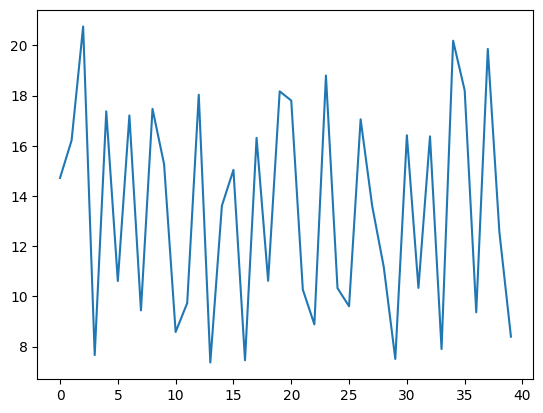

In [28]:
plt.plot(res)

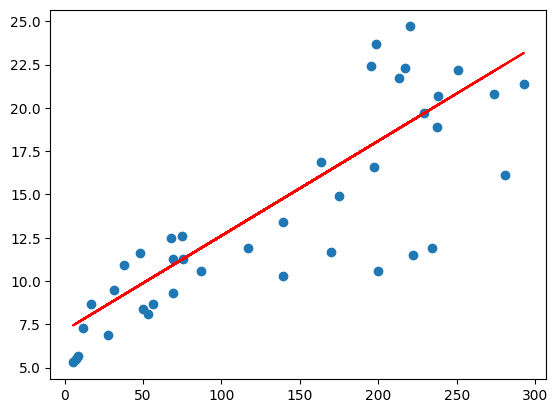

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.14382225 + 0.05473199 * X_test, 'r')
plt.show()

Insights:
- Check for strong correlations (e.g., TV and Sales, Radio and Sales).
- TV has the strongest linear relationship with Sales.
- Newspaper spending shows weaker correlation with Sales.
- Distribution of Sales is slightly skewed.

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np



y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.3f}")
print(f"RMSE: {rmse_lr:.3f}")
print(f"R²: {r2_lr:.3f}")

Linear Regression Performance:
MAE: 2.444
RMSE: 3.194
R²: 0.677


In [99]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)  # Train the model

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Performance:")
print(f"MAE: {mae_dt:.3f}")
print(f"RMSE: {rmse_dt:.3f}")
print(f"R²: {r2_dt:.3f}")


Decision Tree Performance:
MAE: 2.705
RMSE: 3.445
R²: 0.624


In [107]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure that y_train is a 1D array
y_train = y_train.values.ravel()  # or use .flatten() to ensure 1D shape

# Initialize the SVM model
model = SVR(kernel='rbf', C=100, gamma=0.1)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict on the training (seen) data
svm_train_predictions = model.predict(X_train)

# Evaluate the performance on the training data
mae_train = mean_absolute_error(y_train, svm_train_predictions)
rmse_train = mean_squared_error(y_train, svm_train_predictions, squared=False)
r2_train = r2_score(y_train, svm_train_predictions)

print("SVM Model Performance on Seen Data:")
print(f"MAE: {mae_train:.3f}")
print(f"RMSE: {rmse_train:.3f}")
print(f"R²: {r2_train:.3f}")


SVM Model Performance on Seen Data:
MAE: 1.030
RMSE: 2.301
R²: 0.796


Concluding with saying that above mention solution is successfully able to predict the sales using advertising platform datasets